# Evidencia Machine Learning 
Camila P. Cusicanqui Padilla - A00571258

<div style="text-align: justify">  
En este reporte se realizará un análisis sobre el desempeño de un set de datos en el cual generamos un indicadores claros y gráficas comparativas para respaldar nuestro análisis. 

Este set de datos proviene de Kaggle: https://www.kaggle.com/datasets/rsadiq/salary . Estos datos repressentan una relación entre el variable independiente, años de experiencia y Y, nuestra variable dependiente como el salario con un tamaño de muestra de 35 accionistas
    
Presenta las siguientes características: 
</div>

* Total no. de attributes:2
* Tamaño de muestra (n): 30

El análisis tendrá los siguientes elementos: 
* Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
* Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
* Diagnóstico y explicación el grado de varianza: bajo medio alto
* Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

Considerando el análisis previo utilizaremos técnicas de regularización o ajuste de parámetros para mejor nuestro modelo.

In [101]:
# LIBRERÍAS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Medidas de evaluación
from statistics import variance
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV

# Exploración de datos
En está sección realizaremos una exploración de nuestros datos. Es decir, fijarnos en que no hay valores NaNs, nulos o repetidos. 

In [102]:
df = pd.read_csv('Salary_Data.csv')

In [103]:
df.shape

(30, 2)

In [104]:
# Observar si hay NaNs, nulos, duplicados
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

YearsExperience    0
Salary             0
dtype: int64
YearsExperience    0
Salary             0
dtype: int64
0


In [105]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Visualización de los datos utilizando un scatterplot
Deseamos visualizar los datos para asegurarnos que el set de datos se asimila a un comportamiento lineal.

[Text(0.5, 1.0, 'Salario vs. Años de Experiencia')]

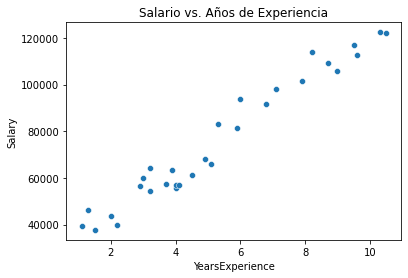

In [106]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary').set(title='Salario vs. Años de Experiencia')

Efectivamente, el comportamiento de los datos es apto para un modelo de regresión lineal. Podemos continuar con la implementación del modelo de regresión lineal. 

Para construir el modelo se realiza una separación del conjunto de datos en 2 sets diferentes. El primer set se constituye en los datos de entrenamiento para el modelo. El segundo set tiene como propósito evaluar la efectividad de nuestro modelo con datos que previamente no había visto. Con esto podemos observar el desempeño de nuestro modelo de regresión lineal. 

In [107]:
# Separación de la base de datos en un set de entrenamiento y evaluación
df_x = df['YearsExperience'].values.reshape(-1, 1)
df_y = df['Salary'].values.reshape(-1, 1)
testp = 0.25
seed = 1800

x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size = testp)

De igual manera, visualizamos los datos de entrenamiento y prueba para asegurarnos que asimila un comportamientob apto para regresión lineal. 

ValueError: Per-column arrays must each be 1-dimensional

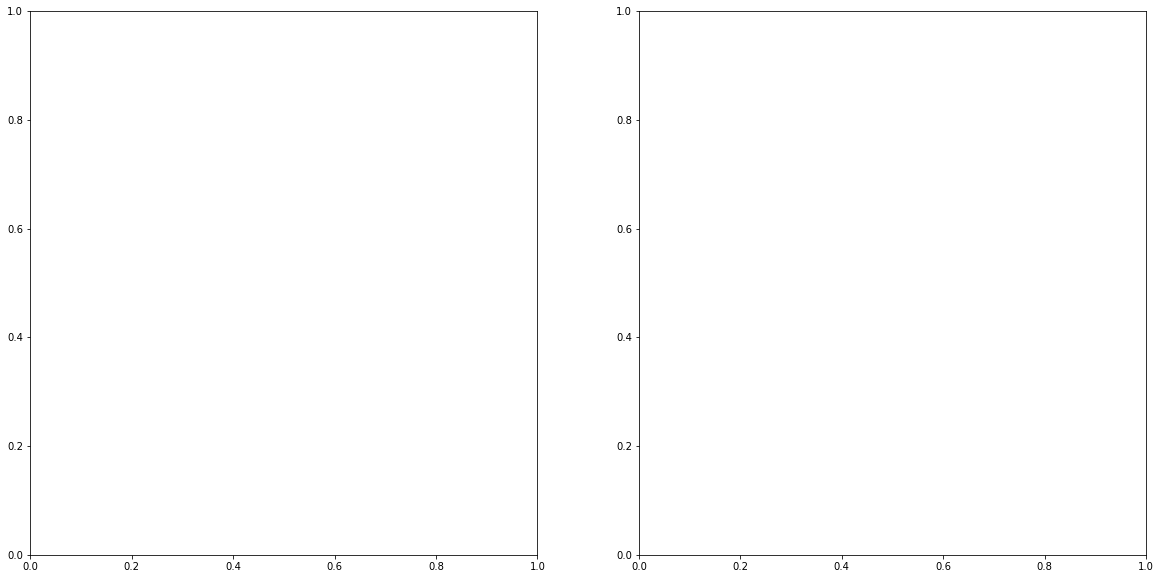

In [108]:
# Visualización de los datos de entrenamiento y prueba
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(x = x_train, y = y_train,ax=ax[0]).set(title = 'Datos de entrenamiento')
sns.scatterplot(x = x_test, y = y_test,ax=ax[1]).set(title = 'Datos de prueba')

75% de nuestro set de datos se utilizarán para entrenar y el resto (25%) se utilizará para comprobar la eficiencia de nuesstro modelo de regresión lineal. Es importante recalcar que el `random_state` se utilizó con el objetivo de realizar todo este proyecto replicable. No hubo alguna modificación en los hiper parámetros al momento de integra `Regresión Lineal`.

In [ ]:
#Establecemos nuestro modelo de regresión lineal
model = LinearRegression()

In [ ]:
# Ajustamos nuestro modelo a los datos de entrenamiento
model.fit(x_train,y_train)

Al entrenar nuestro modelo de regresión lineal ahora comienzamos a predecir valores de Y.

In [ ]:
# Predicimos el salario con nuestro modelo de regresión lineal. 
y_pred = np.array(model.predict(x_test))

In [ ]:
sum(((y_pred-y_test)**2)/len(y_test))

# Análisis del modelo
Durante está sección realizamos los análisis de modelo previamente establecidos: sesgo, variación y ajuste del modelo. 

## Sesgo
El sesgo estadístico es la diferencia que se produce entre un estimador matemático y su valor numérico. Para evaluar esto utilizaremos el coeficiente de determinación y error cuadrático medio los cuales nos permiten medir la distancia entre el nuestro valor esperado y valor real, entre mayor sea este valor menos eficiente nuestro modelo. 

Por esta razón, utilizaremos los valores de y predecida versus el y test. 

In [ ]:
# Coeficiente de determinación
c_mat = r2_score(y_test,y_pred)
print("El coeficiente de determinación es de:", c_mat)

#MSE Mean Squared Error 
MSE = mean_squared_error(y_test,y_pred)
print("El error cuadratico medio es de:", MSE)

#MAE Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
print("El error cuadratico absoluto es de:", mae)

Como podemos observar tenemos un muy buen coeficiente de determinación, es decir, nuestro modelo de regresión lineal. 
Originalmente nuestros datos de las ventas se comportan de la siguiente manera.

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

sns.histplot(df["Salary"],ax = ax[0])
plt.title("Distribución del salario originales")
plt.xlabel("Años de experiencia")

sns.histplot(y_pred,ax = ax[1])
plt.title("Distribución del salario predecidas")
plt.xlabel("Años de experiencia")
plt.show()

Observamos un comportamiento similar en las dos gráficas. 
Ambas presentan dos picos donde el de la izquierda es más pronunciada.
Sin embargo, los picos de la predicción de ventas están desplazados hacia la derecha. 
Es decir, presenta un sesgo negativa. 

## Varianza
En está sección calcularemos la varianza, el cual es una medida de dispersión que se utiliza para representar la variabilidad de un conjunto de datos respecto de la media aritmética de los mismo. Calcularemos la varianza de la Y de prueba y Y de predicción. 

In [ ]:
print("La varianza de y prueba es " , y_test.var())
print("La varianza de y modelo es ", y_pred.var())

Como podemos observar la varianza del modelo es menor a la varianza de la Y de prueba. Es decir, nuestro modelo de regresión lineal es una mejora. 

## Ajuste del Modelo 
Para observar si tenemos underfitting o overfitting utilizaremos el error cuadrático medio, coeficiente de determinación y error absoluto medio con nuestros valores del conjunto de entrenamiento y nuestro modelo. 

In [ ]:
yy_train = model.predict(x_train)

In [ ]:
# Coeficiente de determinación
c_mat = r2_score(yy_train,y_train)
print("El coeficiente de determinación es de:", c_mat)

#MSE Mean Squared Error 
MSE = mean_squared_error(yy_train,y_train)
print("El error cuadratico medio es de:", MSE)

#MAE Mean Absolute Error
mae = mean_absolute_error(yy_train,y_train)
print("El error cuadratico absoluto es de:", mae)

Observamos un coeficiente de determinación menor al coeficiente obtenido previamente. Si el modelo presenta un sobre ajuste el coeficiente de determinación será cercano a 0 y de manera contraria es subajuste. Este caso es un claro ejemplo de subajuste ya que nuestro $r^2$ es cercano a 1.
En conclusión, el modelo contruido de regresión lineal es pobre puesto que cuenta con un subajuste de datos, por lo que es pésimo para predecir el salario de un accionista dado su nivel de experiencia. 

# Mejora del Modelo
... 
Implementar regresión penalizada envés de regresión lineal.... 
